In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/sample_data/Housing.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

545

In [3]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'
# But in order to fit a regression Line, we would need numerical values 

num_vars_b = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map (v1) :
 return v1.map({'yes' : 1, "no": 0})
# Applying the function to the housing List
df[num_vars_b] = df[num_vars_b] . apply(binary_map)
#Check the housing dataframe now
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
df = df.drop(labels = "furnishingstatus", axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [5]:
X= df.iloc[:,1:12]  # get input values from first column 
y = df.iloc[:, 0]  # get output values from second column 
m = len(y) # Number of training examples 
print('X = ', X[:10]) # Show only first 5 records 
print('y = ', y[:10]) 
print('m = ', m) 
X.shape

X =      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0   7420         4          2        3         1          0         0   
1   8960         4          4        4         1          0         0   
2   9960         3          2        2         1          0         1   
3   7500         4          2        2         1          0         1   
4   7420         4          1        2         1          1         1   
5   7500         3          3        1         1          0         1   
6   8580         4          3        4         1          0         0   
7  16200         5          3        2         1          0         0   
8   8100         4          1        2         1          1         1   
9   5750         3          2        4         1          1         0   

   hotwaterheating  airconditioning  parking  prefarea  
0                0                1        2         1  
1                0                1        3         0  
2                0  

(545, 11)

In [6]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0, train_size = .8)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

print(f"No. of training examples: {y_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: 436
No. of testing examples: 109
No. of training examples: 436
No. of testing examples: 109


In [7]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((436, 1)) 
X_2 = np.ones((109,1))
X_0[:5] 
X_2[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [8]:
# Using reshape function convert X 1D array to 2D array of dimension 100X1 
X_1 = X_train.values.reshape(436,11) 
X_3 = X_test.values.reshape(109,11)
X_1[:10] 
X_3[:10]

array([[ 4000,     3,     1,     2,     1,     0,     0,     0,     0,
            1,     0],
       [ 9620,     3,     1,     1,     1,     0,     1,     0,     0,
            2,     1],
       [ 3460,     4,     1,     2,     1,     0,     0,     0,     1,
            0,     0],
       [13200,     2,     1,     1,     1,     0,     1,     1,     0,
            1,     0],
       [ 3660,     4,     1,     2,     0,     0,     0,     0,     0,
            0,     0],
       [ 6350,     3,     2,     3,     1,     1,     0,     0,     1,
            0,     0],
       [ 3850,     3,     1,     1,     1,     0,     0,     0,     0,
            2,     0],
       [ 3480,     3,     1,     2,     0,     0,     0,     0,     0,
            1,     0],
       [ 3512,     2,     1,     1,     1,     0,     0,     0,     0,
            1,     1],
       [ 9000,     4,     2,     4,     1,     0,     0,     0,     1,
            2,     0]])

In [9]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X_train = np.hstack((X_0, X_1)) 
X_test = np.hstack((X_2, X_3))
X_train[:10] 
X_test[:10]

array([[1.000e+00, 4.000e+03, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 9.620e+03, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00],
       [1.000e+00, 3.460e+03, 4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.320e+04, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 3.660e+03, 4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 6.350e+03, 3.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 3.850e+03, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.

In [10]:
theta = np.zeros(12) 
theta 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [12]:
# Lets compute the cost for theta values 
cost = compute_cost(X_train, y_train, theta) 
print('The cost for given values of theta_0 =',cost) 

The cost for given values of theta_0 = 10587991986906.973


In [13]:
def gradient_descent(X, X1, y, y1, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  ef gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  cost_history = np.zeros(iterations) 
  cost_history2 = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha /m) * X.transpose().dot(errors); 
    theta= theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)
    cost_history2[i] = compute_cost(X1, y1, theta) 
 
  return theta, cost_history , cost_history2

In [14]:
theta = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.] 
iterations = 100; 
alpha =0.000000001;

In [15]:
theta, cost_history_a, cost_history_a2 = gradient_descent(X_train, X_test, y_train, y_test, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_a[-1],cost_history_a2[-1]) 

Final value of theta = [1.58482745e-01 7.91750090e+02 5.01744765e-01 2.32533368e-01
 3.35018139e-01 1.43241978e-01 3.91225667e-02 6.55612479e-02
 1.03818931e-02 7.28028715e-02 1.36337630e-01 5.18829872e-02]
cost_history = 1423421280396.8877 313835058781.19104


Text(0.5, 1.0, 'Convergence of gradient descent')

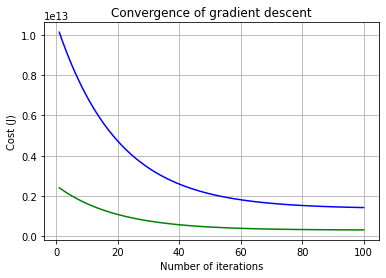

In [16]:
plt.plot(range(1, iterations + 1),cost_history_a, color='blue') 
plt.plot(range(1, iterations + 1),cost_history_a2, color='green') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 